# Machine Learning Engineer Nanodegree
## Model Evaluation & Validation
## Project 1: Predicting Boston Housing Prices

Welcome to the first project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started
In this project, you will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preoprocessing steps have been made to the dataset:
- 16 data points have an `'MDEV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MDEV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MDEV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

Run the code cell below to load the Boston housing dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [15]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import visuals as vs # Supplementary code
from sklearn.cross_validation import ShuffleSplit

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MDEV']
#side note: axis=0 means along rows, axis=1 means along column
features = data.drop('MDEV', axis = 1)
    
# Success
print "Boston housing dataset has {} data points with {} variables each.".format(*data.shape)

Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, you will make a cursory investigation about the Boston housing data and provide your observations. Familiarizing yourself with the data through an explorative process is a fundamental practice to help you better understand and justify your results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MDEV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For your very first coding implementation, you will calculate descriptive statistics about the Boston housing prices. Since `numpy` has already been imported for you, use this library to perform the necessary calculations. These statistics will be extremely important later on to analyze various prediction results from the constructed model.

In the code cell below, you will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MDEV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [16]:
np.std(prices)

165171.13154429477

In [17]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print "Statistics for Boston housing dataset:\n"
print "Minimum price: ${:,.2f}".format(minimum_price)
print "Maximum price: ${:,.2f}".format(maximum_price)
print "Mean price: ${:,.2f}".format(mean_price)
print "Median price ${:,.2f}".format(median_price)
print "Standard deviation of prices: ${:,.2f}".format(std_price)

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


### Question 1 - Feature Observation
As a reminder, we are using three features from the Boston housing dataset: `'RM'`, `'LSTAT'`, and `'PTRATIO'`. For each data point (neighborhood):
- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of all Boston homeowners who have a greater net worth than homeowners in the neighborhood.
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

_Using your intuition, for each of the three features above, do you think that an increase in the value of that feature would lead to an **increase** in the value of `'MDEV'` or a **decrease** in the value of `'MDEV'`? Justify your answer for each._  
**Hint:** Would you expect a home that has an `'RM'` value of 6 be worth more or less than a home that has an `'RM'` value of 7?

**Answer: ** 

<b>RM:</b> As RM <b>increases</b>, we would expect MDEV to <b>increase</b>, assuiming all other variables are equal. The logic is simple, more rooms indicate a bigger home. Bigger homes are more expensive then smaller homes, with all else equal.

<b>LSTAT:</b> As LSTAT <b>decreases</b>, (meaning the neighboorhood is getting richer on average) we would expect MDEV to <b>increase</b>. The logic is that a small LSTAT implies that your neighborhood is in a higher wealth bracket. A higher wealth bracket could be seen as a proxy for neighborhood features like exclusity, low violent crime rates, etc. Or another logical conclusion is if the area has richer people, it most likely has more expensive homes. Or since more expensive homes lead to higher net worth (assuming homes are fully owend), neighborhoods with high expenisve homes would imply a neighborhood with a low LSTAT.

<b>PTRATIO:</b> As PTRATIO <b> decreases</b> (meaning the area is hiring more teachers per student), we would expect MDEV to <b>increase</b>. The logic revolves around the idea of well funded schools. If the schools are well funded, either through local taxes or donations, we would expect more teachers. These good school areas would be highly sought after creating higher demand for families to live in the nieghborhood, so they could send there children to school there. That higher demand for living in the area would cause home prices to rise though a supply and demand argument. 

----

## Developing a Model
In this second section of the project, you will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in your predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 always fails to predict the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. *A model can be given a negative R<sup>2</sup> as well, which indicates that the model is no better than one that naively predicts the mean of the target variable.*

For the `performance_metric` function in the code cell below, you will need to implement the following:
- Use `r2_score` from `sklearn.metrics` to perform a performance calculation between `y_true` and `y_predict`.
- Assign the performance score to the `score` variable.

In [18]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true, y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |
*Would you consider this model to have successfully captured the variation of the target variable? Why or why not?* 

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [19]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print "Model has a coefficient of determination, R^2, of {:.3f}.".format(score)

Model has a coefficient of determination, R^2, of 0.923.


**Answer:** 
Coefficient of determination:

$$R^2 = (\frac{ \frac{1}{N} \sum_i [ (x_i - x)* (y_i - y) ]}{(\sigma_x * \sigma_y ) })^2$$

where N is the number of observations used to fit the model, Σ is the summation symbol, xi is the x value for observation i, x is the mean x value, yi is the y value for observation i, y is the mean y value, σx is the standard deviation of x, and σy is the standard deviation of y. Note for our purposes, x is the true value and y is the predicted value. 

Through this lense,  R2 equals the square of the correlation coefficient between the observed (true) and modeled (predicted) data values. Therefore, the closer to 1 our R^2 is the better the two were linearly correlated, which means the better they move together/are exactly the same. 

At a R2 score of 0.923, we can say 92% of the variance in the true model was predicted by our predicted model. In general, I would say this is rather good. We do a good job of matching the variance in the real data. 





### Implementation: Shuffle and Split Data
Your next implementation requires that you take the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

For the code cell below, you will need to implement the following:
- Use `train_test_split` from `sklearn.cross_validation` to shuffle and split the `features` and `prices` data into training and testing sets.
  - Split the data into 80% training and 20% testing.
  - Set the `random_state` for `train_test_split` to a value of your choice. This ensures results are consistent.
- Assign the train and testing splits to `X_train`, `X_test`, `y_train`, and `y_test`.

In [20]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.20, random_state=42)

# Success
print "Training and testing split was successful."

Training and testing split was successful.


### Question 3 - Training and Testing
*What is the benefit to splitting a dataset into some ratio of training and testing subsets for a learning algorithm?*  
**Hint:** What could go wrong with not having a way to test your model?

**Answer: **

Without splitting one's data, there is no credible data available to see how your model will perform on new data. In other words, if we didn't split, all one could do is run there model on the data they trained it on. Therefore, we would be fitting completely to the data we have available. This means we would fit this data well, but when new data is available we might perform horribly. The reason is, we may overfit this data; Therefore new data would not be generalizable with our learned algorithm. <b>(In short: splitting data tests for overfitting and gives us an estimate of our performance)</b>

If we did this in the real world, we then need to wait for new data to be generated to see how our model does. This can be costly. On one hand, if we then just go to implement our model in production, without ever testing it on new data. It could fail and be extremely costly. On the other hand, if we wait for new data to come in, and then test, we delay our model from being put into production, which is also costly. 

Therefore, splitting gives us data to test how our model may perform on new data, helping us avoid the two scenarios outlined above.


----

## Analyzing Model Performance
In this third section of the project, you'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, you'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing your model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded reigon of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

Run the code cell below and use these graphs to answer the following question.

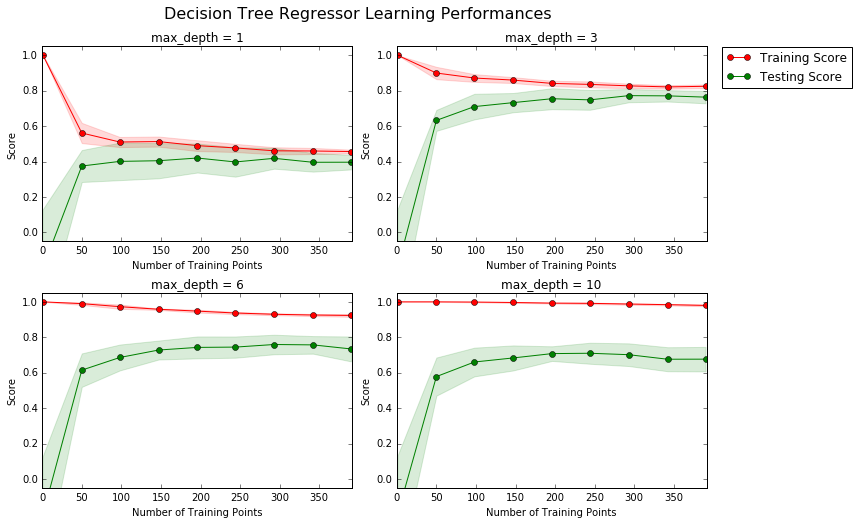

In [21]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

### Question 4 - Learning the Data
*Choose one of the graphs above and state the maximum depth for the model. What happens to the score of the training curve as more training points are added? What about the testing curve? Would having more training points benefit the model?*  
**Hint:** Are the learning curves converging to particular scores?

**Answer: **

<b>Relevent Terms</b>
<ul>
<li><b>Depth</b> of a decision tree is the length of the longest path from a root to a leaf</li>
<li><b>Max Depth</b> of a decision tree is the largest depth that you will allow the decision tree to take (Max depth,in essense, is a measure of your decision tree's complexity; more depth means more layer of rules)</li>
</ul>

Looking at the graph in the upper right, that is the graph with a <b>max depth=3</b>, we see the learning curve for the training set slowly declines as the number of points in the training set increases. On its slow decline, it appears to approach roughly an R^2 score of 0.80. A decline (or at best stagnanation) is expected at any depth level, as we go from one point in the training set to more. Basically, one rule could easily classify a few points, its when you have many and variation that more rules are needed. 

In this case, adding training points doesn't do much to change the R^2 score of the training set, especially once we have a around 200 points. Changing focus to the testing set's learning curve, we see a ramp up to a R^2 score above 0.60 as we add just 50 points to the trainging set. From there, the testing set learning curve slowly increases to right below an R^2 score of 0.80. The initial ramp up makes sense, because having just a few points in the testing set would fail to accurately capture variation in the data. So new data would most likely not be accuarely predicted. 

Overall, this max depth=3 seems to be the sweet spot out of these four graphs. The training and testing set learning curves seem to converge at about 0.80, which is the best R^2 score with convergence out of the graphs. 

Also, for this graph, adding more data points to the training set is unlikely to improve the R^2 scores of the two learning curves. Therefore, it is unlikely to benefit the model in terms of our performance metric, R^2. I would note, it could be conceivable to improve the model on some other performance metric, but we would need to investigate that further. 

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  

Run the code cell below and use this graph to answer the following two questions.

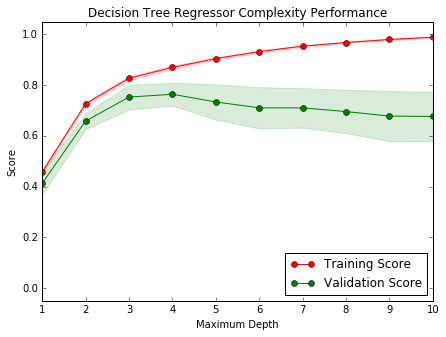

In [22]:
vs.ModelComplexity(X_train, y_train)

### Question 5 - Bias-Variance Tradeoff
*When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10? What visual cues in the graph justify your conclusions?*  
**Hint:** How do you know when a model is suffering from high bias or high variance?

**Answer: **

<i>When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance?</i><br>
The model is likely suffering from error due to bias -in otherwords is underfitted. Simply put, the model is too simple and doesn't have enough rules to classify/predict. By looking at the complexity graph, we see that the training and testing scores are low (a sign of poor prediction). This leads me to believe that the model is performing poorly because of lack of complexity. i.e. bias.

<i>How about when the model is trained with a maximum depth of 10?</i><br>
The model is likely suffereing from error due to variance - in other words overfitting. As we let the model become more complex, it does a better job of learning the variation in the training points. However, this closer match on the training set, can translate into greater error on the test set because the variance matched on the training does not generalize nicely to the test. This can be clearly seen in the complexity graph. Maximum depth improves the training score, but begins to negatively effect the testing (validation) score. 


### Question 6 - Best-Guess Optimal Model
*Which maximum depth do you think results in a model that best generalizes to unseen data? What intuition lead you to this answer?*

**Answer: **

A <b>maximum depth of 3</b> results in a model that best generalizes the unseen data. The validation score reaches it apex here (maybe max depth 4 is higher, but I'll explain), which means further depth (model complexity) leads to overfitting. I would note, some may argue for a max depth of 4, but that depth seems to give little to almost no increase to validation score. Therefore, by Occan's razor, we should select the simpler model (i.e. the one with lower depth).

-----

## Evaluating Model Performance
In this final section of the project, you will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

### Question 7 - Grid Search
*What is the grid search technique and how it can be applied to optimize a learning algorithm?*

**Answer: **

When we optimize/learn an algorthim, we are minimzing/maximizing some objective function by solving for model parameters (i.e. the slope and intercept in a simple univariate linear regression) . Sometimes, the methods we use to solve these learning algortihms, have other "parameters" we need to choose/set. One example would be the learing rate in stochastic gradient descent. These "parameters" are called hyperparameters. They can be set manually or chosen through some external model mechanism. 

One such mechanism is grid search. Grid search is a traditional way of performing hyperparameter optimization (sometimes called parameter sweep), which is simply an exhaustive search through a manually specified subset of the hyperparameter space of a learning algorithm. Grid search is guided by some performance metric, typically measured by cross-validation on the training set or evaluation on a held-out validation set.

### Question 8 - Cross-Validation
*What is the k-fold cross-validation training technique? What benefit does this technique provide for grid search when optimizing a model?*  
**Hint:** Much like the reasoning behind having a testing set, what could go wrong with using grid search without a cross-validated set?

**Answer: **

K-fold cross-validation is a step up from just simply splitting your data into a training and test set. The data set is divided into k subsets, and the normal cross validation is repeated k times. Each time, one of the k subsets is used as the test set and the other k-1 subsets are put together to form a training set. Then the average error across all k trials is computed. One advantage of this method, is how the data is split. Each data point gets to be in a test set exactly once, and gets to be in a training set k-1 times. Therefore, the variance of the resulting estimate is reduced as k is increased. One disadvantage of this method is that the training algorithm has to be rerun k times, which means its more costly. 

Using k-fold cross-validation as a performance metric for grid search gives us more belief (less variance) in our hyperparameter choice then just a simple cross validation. It let us minimze error for a given hpyerparameter over k instances, leading to a better (less variant choice in the hyperparameer). Therefore, we do not just chose are parameter on one instance of the learned model. Also, not using any form of cross validation for grid search, would leave us unaware if are hyperparameter would be any good with new data (most likely, it would not be very good).

### Implementation: Fitting a Model
Your final implementation requires that you bring everything together and train a model using the **decision tree algorithm**. To ensure that you are producing an optimized model, you will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

For the `fit_model` function in the code cell below, you will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [24]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn import grid_search
 
def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor(random_state=0)

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':range(1,11)}

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # TODO: Create the grid search object
    grid = grid_search.GridSearchCV(regressor, params, error_score=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

### Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a *decision tree regressor*, the model has learned *what the best questions to ask about the input data are*, and can respond with a prediction for the **target variable**. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.

### Question 9 - Optimal Model
_What maximum depth does the optimal model have? How does this result compare to your guess in **Question 6**?_  

Run the code block below to fit the decision tree regressor to the training data and produce an optimal model.

In [25]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print "Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth'])

Parameter 'max_depth' is 4 for the optimal model.


**Answer: **

The model has an optimal max depth of 4. This makes sense, because the performace metric on the test (validation) set has the highest performance score here. In question six, I picked a max depth of 3 because, I believed by looking, the two depths were nearly the same and picked the less complex one. However this code, shows that the performance score with a max depth of 4 is higher than 3. If this is are only consideration, then we must pick a max depth of 4. 

Reflecting now, I would like to know if the graphs above were done with k-folds or just simple cross validation.

### Question 10 - Predicting Selling Prices
Imagine that you were a real estate agent in the Boston area looking to use this model to help price homes owned by your clients that they wish to sell. You have collected the following information from three of your clients:

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Household net worth (income) | Top 34th percent | Bottom 45th percent | Top 7th percent |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |
*What price would you recommend each client sell his/her home at? Do these prices seem reasonable given the values for the respective features?*  
**Hint:** Use the statistics you calculated in the **Data Exploration** section to help justify your response.  

Run the code block below to have your optimized model make predictions for each client's home.

In [26]:
# Produce a matrix for client data
client_data = [[5, 34, 15], # Client 1
               [4, 55, 22], # Client 2
               [8, 7, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print "Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price)

Predicted selling price for Client 1's home: $344,400.00
Predicted selling price for Client 2's home: $237,478.72
Predicted selling price for Client 3's home: $931,636.36


**Answer: **

Above, we see the predicted value these clients should sale their home's at.

Client 3's prediction is the only one I might have some faith in. Client 3 is very close to the top in terms of wealth, has a lot of rooms, and good student to teacher ratio. Their predicted home price is below the max price in the sample, and in within a range to the max that seems to make sense, based on their statistics.

The other two, I am much more skeptical about. Client 1 is right outside the top 33%. Yet has a predicted home price below both the mean and median. I would of expected it to be slighly on the above side.

Client 2 is just below the middle of the pack and has a predicted home price more than one standard deviation away from the mean. I would of expected within a std below the mean.

Thinking about these in totality, I feel the model may not be useful for predicting what price clients should sell their home at.

<b>Statistics from above reproduced for reference</b>
Minimum price: 105,000.00
Maximum price: 1,024,800.00
Mean price: 54,342.94
Median price 438,900.00
Standard deviation of prices: 165,171.13



### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with the data it's trained on.

In [27]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $324,240.00
Trial 2: $302,400.00
Trial 3: $346,500.00
Trial 4: $420,622.22
Trial 5: $302,400.00
Trial 6: $411,931.58
Trial 7: $344,750.00
Trial 8: $407,232.00
Trial 9: $352,315.38
Trial 10: $316,890.00

Range in prices: $118,222.22


### Question 11 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

**Answer: **

<b>It should not be used in a real world setting.</b> Starting with the sensitivity section we ran above, it seems just the splitting of the data can lead to a wide distribution in predicted sale price of a home for a single client. Looking above, we see the range in predictions is over 100K. When we are predicting a price in the 300k range, we're looking at mispricing a home by around 33%, which could be a huge loss for the client and our commission if we're on the low side, and a waste of time if we overpirce and no one buys. (Therefore, not robust enough to make consistent predictions)

Seondly, this data is from the 70's. Who knows how much of these features are still accurate. Things like gentrification could greatly change area dynamics. Also, t could fail to capture the time related factors. One example would be home style. A highly sought after home style in the 70's could be a very unattractive selling point now. (think new open areas versus classical closed off rooms).

This point leads me into another: the model most likely doesn't have enough features to truly capture the price of a home. Zillow and Redfin uses things like crime rates, number of bathrooms, ammendities (porch, garage, pool, etc.), style, health (brand new, newly renovated, falling down), and others to try a capture price. 

Lastly, this model would be terrible if used in a rural area. Rural areas tend to have cheaper per square footage, which means you could have a lot more rooms and still have a cheaper home than a few bedroom place in an urban area. Becuae this model only has 3 features and one of them is bedrooms, this model is most likely putting way too much wieght on that feature for a rural area. 

Overall, models need to have enough features and possibily even area specific features to do a good job learning home prices. This model does not do that.

